## ***Predicting** number of bikers on a given day using linear regression*


In [1]:
from IPython.display import clear_output
%pip install gdown==4.5
clear_output()

#### ***Download** the CSV file*

In [2]:
!gdown 1_eJU8Y-31_l0oq1sSJT6pROJyo-ufuvD

Downloading...
From: https://drive.google.com/uc?id=1_eJU8Y-31_l0oq1sSJT6pROJyo-ufuvD
To: /Users/abdullah/Desktop/Abdullah Eid 1116364900/bikers_data.csv
100%|█████████████████████████████████████████| 213k/213k [00:00<00:00, 991kB/s]


#### ***Import** libaries*

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### ***Load** Data and start exploring*

In [15]:
df = pd.read_csv('bikers_data.csv')
df.head()

,Date,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1
1,2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1
2,2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1
3,2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1
4,2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,60.5,1


#### ***Drop** the date column*

In [16]:
df = df.drop(['Date'], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2646 entries, 0 to 2645
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number of bikers  2646 non-null   float64
 1   Mon               2646 non-null   float64
 2   Tue               2646 non-null   float64
 3   Wed               2646 non-null   float64
 4   Thu               2646 non-null   float64
 5   Fri               2646 non-null   float64
 6   Sat               2646 non-null   float64
 7   Sun               2646 non-null   float64
 8   holiday           2646 non-null   float64
 9   daylight_hrs      2646 non-null   float64
 10  Rainfall (in)     2646 non-null   float64
 11  Temp (F)          2646 non-null   float64
 12  dry day           2646 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 268.9 KB


#### ***Feature** engineering*

In [18]:
df['daylight_hrs**2'] = df['daylight_hrs'] ** 2
df['daylight_hrs**3'] = df['daylight_hrs'] ** 3

df['Rainfall (in)**2'] = df['Rainfall (in)'] ** 2
df['Rainfall (in)**3'] = df['Rainfall (in)'] ** 3

df['Temp (F)**2'] = df['Temp (F)'] ** 2
df['Temp (F)**3'] = df['Temp (F)'] ** 3

df.head()

,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day,daylight_hrs**2,daylight_hrs**3,Rainfall (in)**2,Rainfall (in)**3,Temp (F)**2,Temp (F)**3
0,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1,127.178831,1434.241368,0.0,0.0,3136.00,175616.000
1,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1,125.869138,1412.143683,0.0,0.0,3192.25,180362.125
2,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1,124.568758,1390.316584,0.0,0.0,3540.25,210644.875
3,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1,123.277863,1368.761077,0.0,0.0,3660.25,221445.125
4,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,60.5,1,121.996624,1347.478113,0.0,0.0,3660.25,221445.125


#### ***Splitting** data frame*

In [19]:
# Splitting data and convert it to numpy array
# And shuffling data there is many benefits, like avoiding bised order
def train_test_splitting(data, train_percentage=0.8):
    data = np.array(data)
    np.random.shuffle(data)
    split_idx = int(train_percentage * len(data))
    train_set = data[:split_idx, :]
    test_set = data[split_idx: , :]
    return train_set, test_set

In [20]:
train_set, val_set = train_test_splitting(df) # Call the function

In [21]:
X_train = train_set[:,1:] # input features for training set
y_train = train_set[:,0] # target column for training set
X_val = val_set[:,1:] # input features for validation set
y_val = val_set[:,0] # target column for validation set

#### ***Normal** equation*

In [25]:
W = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)  # Weights

In [26]:
y_pred = X_val @ W

#### ***Visualize** the validation results*

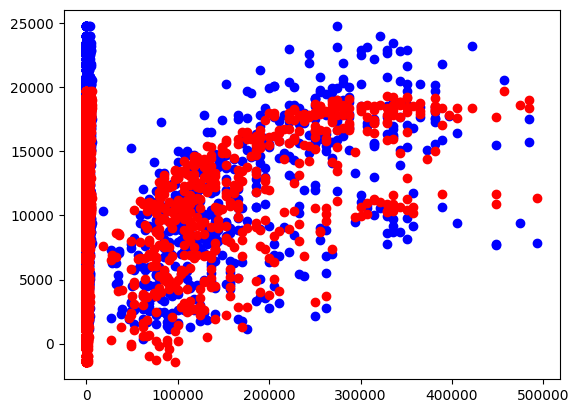

In [27]:
plt.plot(X_val,y_val,'bo', X_val, y_pred, 'ro')
plt.show()

#### ***Calculate** MSE*

In [28]:
Loss = np.sum(np.square(y_val - y_pred)) / y_pred.shape[0]
print(Loss)

5423284.477684735


#### *Anthor solution by using **Sklearn***

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [30]:
y_hat = model.predict(X_val)

#### ***Calculate** MSE*

In [38]:
print(np.sum(np.square(y_val - y_hat)) / y_hat.shape[0])

5423284.49894194


#### ***Print** five samples and its actual value and predicted value*

In [37]:
# This 5 sample and it actual value and predicted value
for i in range(min(5, len(y_pred))):
  print(f'Sample {i + 1}:\nFeatures {X_val[i]}\nActual y ={y_val[i]}\nPredicted y ={y_hat[i]}\n')

Sample 1:
Features [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.88997167e+00 0.00000000e+00 4.40000000e+01 1.00000000e+00
 7.90315962e+01 7.02588651e+02 0.00000000e+00 0.00000000e+00
 1.93600000e+03 8.51840000e+04]
Actual y =13276.0
Predicted y =11672.064906614258

Sample 2:
Features [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.14643658e+00 0.00000000e+00 5.05000000e+01 1.00000000e+00
 8.36573021e+01 7.65166208e+02 0.00000000e+00 0.00000000e+00
 2.55025000e+03 1.28787625e+05]
Actual y =17868.0
Predicted y =13772.209382810564

Sample 3:
Features [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 8.39070358e+00 8.00000000e-02 4.10000000e+01 0.00000000e+00
 7.04039066e+01 5.90738311e+02 6.40000000e-03 5.12000000e-04
 1.68100000e+03 6.89210000e+04]
Actual y =282